In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
df_test = pd.read_csv("/content/sample_data/mnist_test.csv")

In [3]:
print(df_train.shape, df_test.shape) 
# image of each hand-written number is 28 * 28 (= 784) pixels whose data are located in the corresponding row

(19999, 785) (9999, 785)


In [4]:
df_train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.tail()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.tail()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data_train = df_train.values
data_test = df_test.values

In [9]:
print(data_train.shape, data_test.shape, type(data_train), type(data_test))

(19999, 785) (9999, 785) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
print(data_train[0, 0], data_train[0, 1:].shape)

5 (784,)


In [11]:
img = data_train[701, 1:].reshape(28, 28)
label = data_train[701, 0]

3


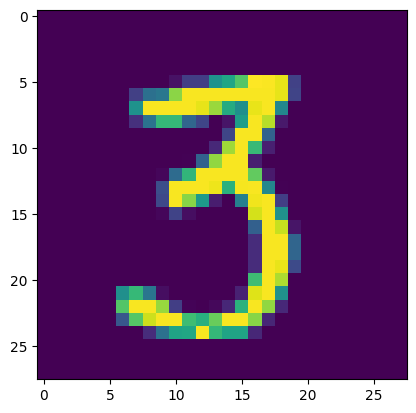

In [12]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(img)

3


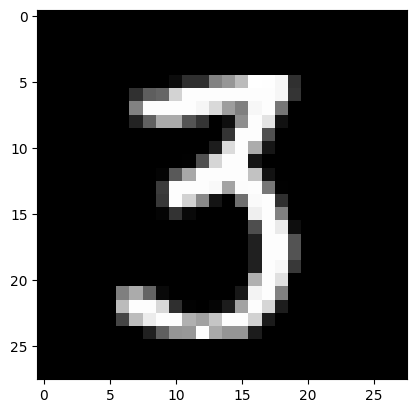

In [13]:
print(label)
plt.imshow(img, cmap='gray')

In [14]:
# normalization (min/max scaler)
x_train = data_train[:, 1:] / 255.
y_train = data_train[:, 0]
x_test = data_test[:, 1:] / 255.
y_test = data_test[:, 0]

In [15]:
# categorical form or one hot encoding
from keras.utils import to_categorical

y_train_ctg = to_categorical(y_train)
y_test_ctg = to_categorical(y_test)

In [16]:
print(y_train[0], y_train_ctg[0], y_train.shape, y_train_ctg.shape, x_train.shape[1:])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] (19999,) (19999, 10) (784,)


In [17]:
from keras.callbacks import EarlyStopping 

callback = EarlyStopping(patience=5, restore_best_weights=True)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=x_train.shape[1:]))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(y_train_ctg.shape[1], activation='softmax')) 
# y_train_ctg.shape[1] is 10, i.e. 10 neurons indicating 10 class of numbers (0, ..., 9) in the output layer

model.compile(loss='categorical_crossentropy')

print(model.summary()) # 256 * 784 + 256 = 200960 (number of weights in the first layer)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
results = model.fit(x_train, y_train_ctg, epochs=20, validation_data=(x_test, y_test_ctg), callbacks=callback)

Epoch 1/20
625/625 [==============================] - 13s 19ms/step - loss: 0.3584 - val_loss: 0.1817
Epoch 2/20
625/625 [==============================] - 11s 18ms/step - loss: 0.1463 - val_loss: 0.1328
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0987 - val_loss: 0.1198
Epoch 4/20
625/625 [==============================] - 7s 10ms/step - loss: 0.0692 - val_loss: 0.1124
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0507 - val_loss: 0.1244
Epoch 6/20
625/625 [==============================] - 6s 9ms/step - loss: 0.0407 - val_loss: 0.1191
Epoch 7/20
625/625 [==============================] - 5s 9ms/step - loss: 0.0317 - val_loss: 0.1307
Epoch 8/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0248 - val_loss: 0.1256
Epoch 9/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0186 - val_loss: 0.1500


In [20]:
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [21]:
print(yhat_train.shape, yhat_train[0], yhat_train[0].round(), y_train_ctg[0])

(19999, 10) [8.2139455e-11 2.2626201e-10 8.8306848e-11 1.6640217e-04 2.5103747e-10
 9.9982858e-01 8.2120352e-11 1.4102198e-09 4.1346598e-06 9.7707448e-07] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
print(y_train[:5], y_train_ctg[:5], yhat_train[:5])


[5 7 9 5 2] [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] [[8.2139455e-11 2.2626201e-10 8.8306848e-11 1.6640217e-04 2.5103747e-10
  9.9982858e-01 8.2120352e-11 1.4102198e-09 4.1346598e-06 9.7707448e-07]
 [2.5702626e-05 5.7987770e-10 2.6096478e-07 3.0635974e-09 7.3425826e-07
  3.9742434e-05 9.7759090e-10 9.9989873e-01 2.6316684e-09 3.4856468e-05]
 [1.5286302e-09 4.1215675e-09 1.1909419e-08 4.2138408e-06 8.5359631e-04
  1.7265025e-06 7.5033799e-11 4.6608708e-05 2.0958780e-07 9.9909365e-01]
 [2.1002203e-10 4.8087090e-10 1.1785175e-09 1.9472676e-03 1.1826699e-09
  9.9795461e-01 4.7560322e-10 1.5836560e-09 9.6196942e-05 1.9279694e-06]
 [2.1866815e-09 1.3641102e-07 9.9996465e-01 1.6257874e-06 1.9977595e-09
  2.4421660e-09 1.5786414e-08 3.3311127e-05 2.5232166e-07 1.4816481e-11]]


In [23]:
print(y_train_ctg[4])
print(yhat_train[4].round())

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

print(cr(y_train_ctg, yhat_train.round()))
print(cr(y_test_ctg, yhat_test.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1962
           1       1.00      0.99      0.99      2243
           2       0.99      0.99      0.99      1989
           3       0.98      0.99      0.98      2021
           4       0.99      0.99      0.99      1924
           5       1.00      0.98      0.99      1761
           6       1.00      0.99      1.00      2038
           7       0.99      0.99      0.99      2126
           8       0.99      0.99      0.99      1912
           9       0.99      0.99      0.99      2023

   micro avg       0.99      0.99      0.99     19999
   macro avg       0.99      0.99      0.99     19999
weighted avg       0.99      0.99      0.99     19999
 samples avg       0.99      0.99      0.99     19999

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(yhat_train.round())
print(yhat_train.round().argmax(axis=1), yhat_train.round().argmax(axis=1).shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 7 9 ... 2 9 5] (19999,)


In [26]:
print(yhat_train[200].round())
print(yhat_train[200].round().argmax())

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [27]:
print(cm(y_train, yhat_train.round().argmax(axis=1)))
print(cm(y_test, yhat_test.round().argmax(axis=1)))


[[1955    0    0    0    0    0    0    0    3    4]
 [   4 2217    5    2    7    0    1    3    3    1]
 [   7    1 1971    1    0    0    0    6    3    0]
 [   9    0    4 1998    0    1    0    1    4    4]
 [   5    0    1    0 1909    0    1    2    1    5]
 [   5    0    0   29    1 1721    2    1    2    0]
 [   6    0    0    0    0    3 2022    0    7    0]
 [   3    2    3    0    2    0    0 2113    0    3]
 [   8    7    1    2    0    0    0    2 1887    5]
 [   8    1    0    6    5    1    0    7    1 1994]]
[[ 967    0    1    0    2    2    2    1    4    1]
 [   3 1119    3    0    0    1    3    2    4    0]
 [   4    0 1001    9    2    0    2   10    4    0]
 [   5    0    9  981    0    2    0    6    6    1]
 [   5    0    4    0  952    0    3    5    2   11]
 [  14    0    1   26    2  827    5    1   12    4]
 [  17    3    0    1    6    8  920    1    2    0]
 [   6    1    8    1    0    0    0 1006    0    5]
 [  16    1    3    9    6    4    3    8  92

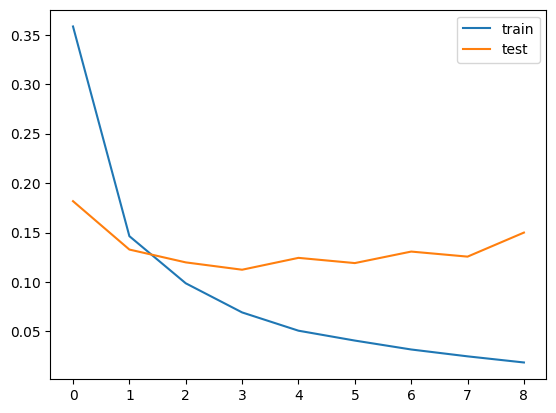

In [28]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='test')
plt.legend()

In [29]:
model.save('my_model.h5')

In [30]:
from keras.models import load_model

model1 = load_model('my_model.h5')

yhat_test_new = model1.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [31]:
model1.fit(x_train, y_train_ctg, epochs=20, validation_data=(x_test, y_test_ctg))

Epoch 1/20
625/625 [==============================] - 8s 11ms/step - loss: 0.0534 - val_loss: 0.1439
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 0.0402 - val_loss: 0.1465
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0280 - val_loss: 0.1388
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0237 - val_loss: 0.1392
Epoch 5/20
625/625 [==============================] - 5s 9ms/step - loss: 0.0180 - val_loss: 0.1524
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 0.0137 - val_loss: 0.1599
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0131 - val_loss: 0.1632
Epoch 8/20
625/625 [==============================] - 7s 11ms/step - loss: 0.0108 - val_loss: 0.1820
Epoch 9/20
625/625 [==============================] - 6s 9ms/step - loss: 0.0086 - val_loss: 0.1967
Epoch 10/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0074 - val_loss: 0